In [3]:
import pandas as pd
df = pd.read_csv("F:/Data CSVs/archive/Churn_Modelling.csv")

In [4]:
# Check Data Types and Summary Statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  1000

In [5]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
# Find cactegorical variables
print(df.select_dtypes(include=['object']).columns)

Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [7]:
# Convert Categories to Numbers (Label Encoding & One-Hot Encoding)
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)


In [8]:
!pip install seaborn

In [9]:
print(df.head(10))

   RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502   42       8  159660.80   
3          4    15701354      Boni          699   39       1       0.00   
4          5    15737888  Mitchell          850   43       2  125510.82   
5          6    15574012       Chu          645   44       8  113755.78   
6          7    15592531  Bartlett          822   50       7       0.00   
7          8    15656148    Obinna          376   29       4  115046.74   
8          9    15792365        He          501   44       4  142051.07   
9         10    15592389        H?          684   27       2  134603.88   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0   

In [10]:
df.drop(columns=['Surname'], inplace=True)


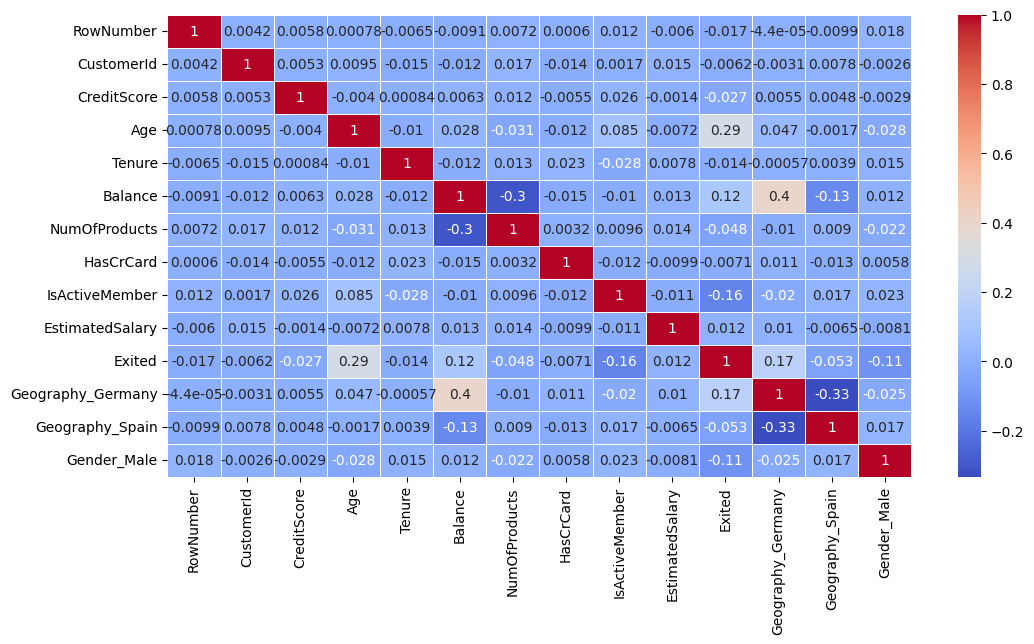

In [11]:
# Check Feature Correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [12]:
# Drop Highly Correlated or Unimportant Features
df.drop(columns=['CustomerId'], inplace=True )

In [13]:
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [14]:
!pip install scikit-learn

In [15]:
df = df.drop(columns=['RowNumber'])


In [16]:
X = df.drop(columns=['Exited'])  # Features
y = df['Exited']  # Target


In [18]:
# Splitting Data into Train & Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (8000, 11)
Testing Data Shape: (2000, 11)


In [20]:
# Model Selection and Training
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)  # Train the model


LogisticRegression(max_iter=10000)

In [21]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8085
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.60      0.18      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.58      2000
weighted avg       0.78      0.81      0.77      2000



In [22]:
# Improving Model Performance (Hyperparameter Tuning & Feature Engineering)
# Train a Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.8645
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [23]:
# Tune Hyperparameters (GridSearchCV for Optimization)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 15, 'n_estimators': 150}


C:\Users\win\AppData\Local\Temp\ipykernel_8684\2397813691.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Exited'], legend = False, palette="coolwarm")


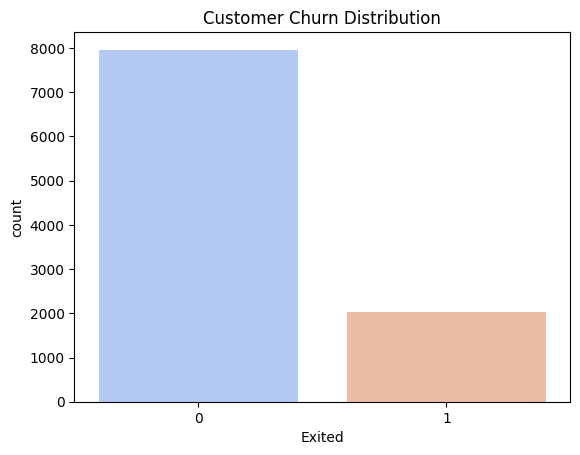

In [33]:
# Visualizing Churn Insights
# univariate Analysis
# Distribution of Target Variable (exited)
sns.countplot(x=df['Exited'], legend = False, palette="coolwarm")
plt.title("Customer Churn Distribution")
plt.show()



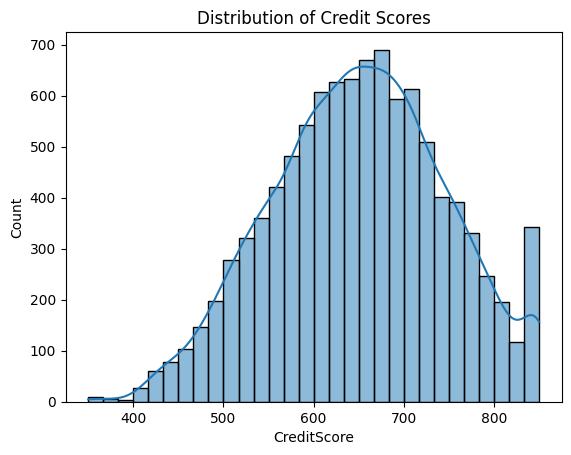

In [26]:
# Credit Score Distribution (Helps identify high-risk vs. low-risk customers.)
sns.histplot(df['CreditScore'], bins=30, kde=True)
plt.title("Distribution of Credit Scores")
plt.show()


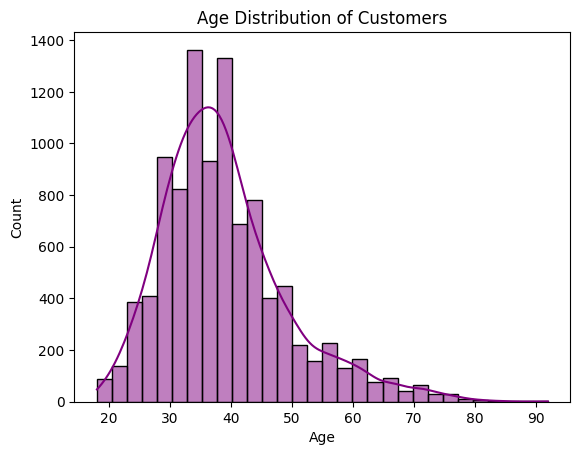

In [27]:
# Age Distribution (Check if older customers are more likely to churn.)
sns.histplot(df['Age'], bins=30, kde=True, color="purple")
plt.title("Age Distribution of Customers")
plt.show()


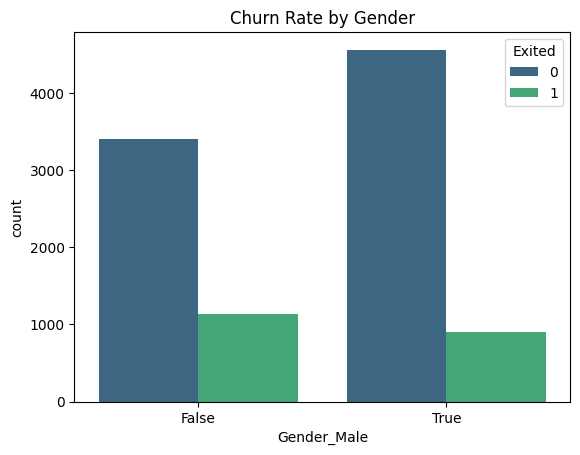

In [37]:
# Bivariate Analysis (Relationship Between Two Variables) 
# Churn Rate by Gender (Helps see if genger effects churn)
sns.countplot(x='Gender_Male', hue='Exited', data=df, palette="viridis")
plt.title("Churn Rate by Gender")
plt.show()


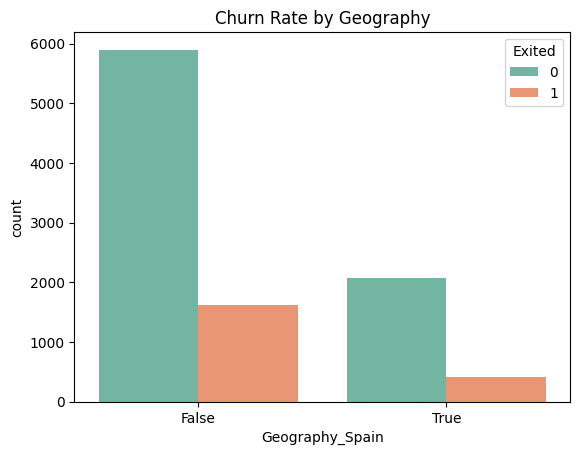

In [41]:
# Churn rate by geography (Check if some countries have more churn than others.)
sns.countplot(x='Geography_Spain', hue='Exited', data=df, palette="Set2")
plt.title("Churn Rate by Geography")
plt.show()


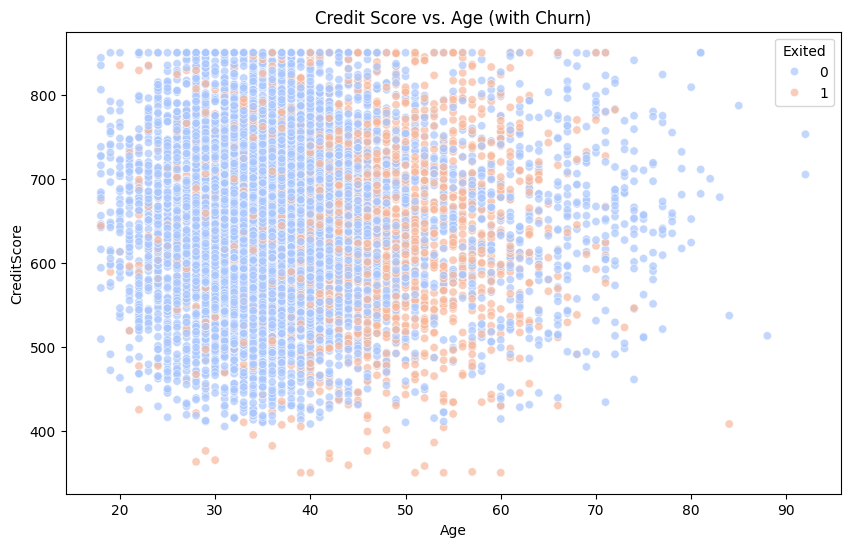

In [42]:
# credit score vs age (See if older customers with lower credit scores churn more.)
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Age'], y=df['CreditScore'], hue=df['Exited'], palette="coolwarm", alpha=0.7)
plt.title("Credit Score vs. Age (with Churn)")
plt.show()


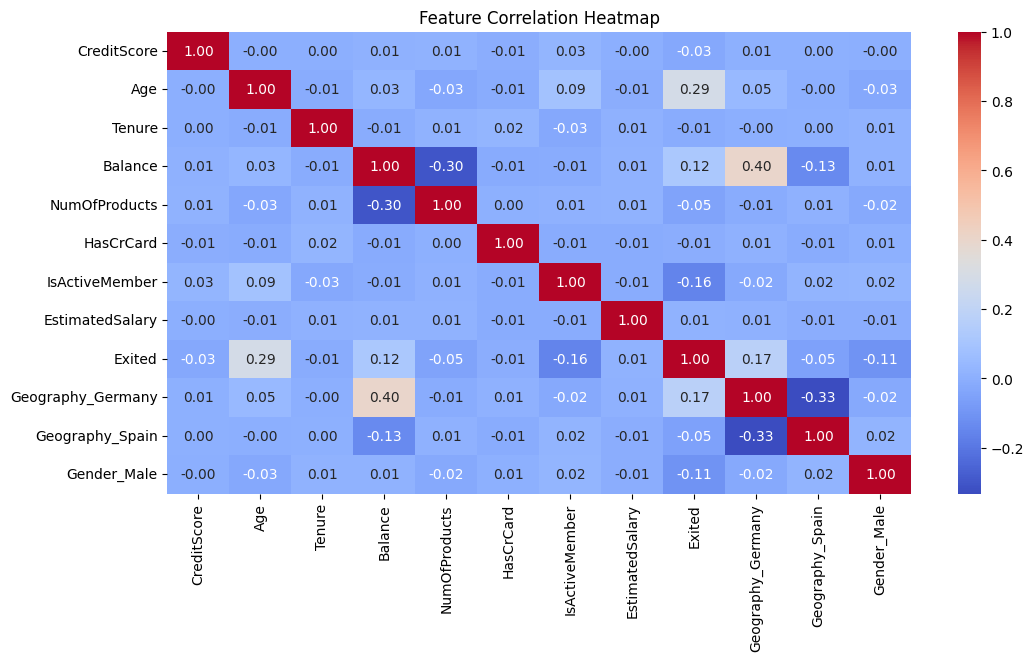

In [43]:
# Correlation Matrix ( Feature Relationships) - Identify which features impact churn the most.
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


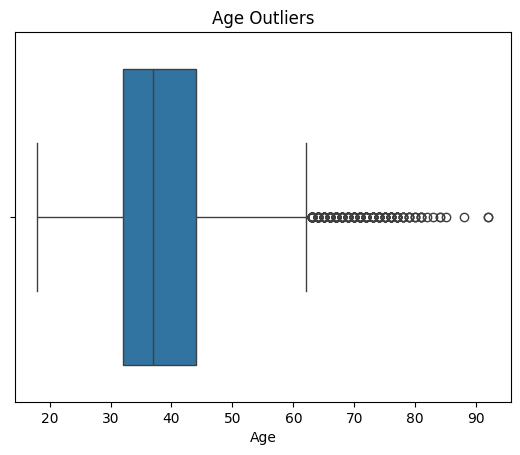

In [45]:
# Boxplot for outliers
sns.boxplot(x=df['Age'])
plt.title("Age Outliers")
plt.show()


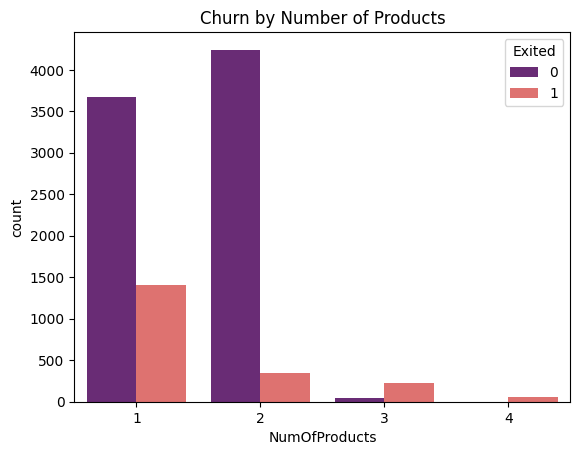

In [47]:
# churn rate by number of products 
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette="magma")
plt.title("Churn by Number of Products")
plt.show()


In [48]:
import joblib

joblib.dump(rf_model, "churn_model.pkl")


['churn_model.pkl']